In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/demand-forecasting-with-tabular-textual-images/beach_demand_forecast/items.csv
/kaggle/input/demand-forecasting-with-tabular-textual-images/beach_demand_forecast/resturants.csv
/kaggle/input/demand-forecasting-with-tabular-textual-images/beach_demand_forecast/sales_train.csv
/kaggle/input/demand-forecasting-with-tabular-textual-images/beach_demand_forecast/cam/2020_01_04.jpg
/kaggle/input/demand-forecasting-with-tabular-textual-images/beach_demand_forecast/cam/2019_07_15.jpg
/kaggle/input/demand-forecasting-with-tabular-textual-images/beach_demand_forecast/cam/2021_09_13.jpg
/kaggle/input/demand-forecasting-with-tabular-textual-images/beach_demand_forecast/cam/2021_06_15.jpg
/kaggle/input/demand-forecasting-with-tabular-textual-images/beach_demand_forecast/cam/2019_05_31.jpg
/kaggle/input/demand-forecasting-with-tabular-textual-images/beach_demand_forecast/cam/2021_12_17.jpg
/kaggle/input/demand-forecasting-with-tabular-textual-images/beach_demand_forecast/cam/2020_04_07.

 I want do some basic Exploratory data analysis (EDA) [on the beachfront demand forecasting dataset](https://www.kaggle.com/datasets/jeffheaton/demand-forecasting-with-tabular-textual-images)

In [2]:
import pandas as pd
import os

PATH_CSV = '/kaggle/input/demand-forecasting-with-tabular-textual-images/beach_demand_forecast'

df_sales = pd.read_csv(os.path.join(PATH_CSV,"sales_train.csv"))
df_items = pd.read_csv(os.path.join(PATH_CSV,"items.csv"))
df_resturant = pd.read_csv(os.path.join(PATH_CSV,"resturants.csv"))

In [3]:
df_items.head()

,id,store_id,name,kcal,cost
0,1,4,Chocolate Cake,554,6.71
1,2,4,Breaded Fish with Vegetables Meal,772,15.09
2,3,1,Sweet Fruity Cake,931,29.22
3,4,1,Amazing Steak Dinner with Rolls,763,26.42
4,5,5,Milk Cake,583,6.07


In [4]:
df_resturant.head()

,id,name
0,1,Bob's Diner
1,2,Beachfront Bar
2,3,Sweet Shack
3,4,Fou Cher
4,5,Corner Cafe


In [5]:
df_sales.head()

,date,item_id,price,item_count
0,2019-01-01,3,29.22,2.0
1,2019-01-01,4,26.42,22.0
2,2019-01-01,12,4.87,7.0
3,2019-01-01,13,4.18,12.0
4,2019-01-01,16,3.21,136.0


In [6]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109600 entries, 0 to 109599
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        109600 non-null  object 
 1   item_id     109600 non-null  int64  
 2   price       109600 non-null  float64
 3   item_count  109600 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.3+ MB


In [7]:
df_sales["date"] = pd.to_datetime(df_sales.date, errors='coerce') 

In [8]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109600 entries, 0 to 109599
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        109600 non-null  datetime64[ns]
 1   item_id     109600 non-null  int64         
 2   price       109600 non-null  float64       
 3   item_count  109600 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 3.3 MB


### Now we add two fields, weekday and week that show the day of the week and the day of the current year

In [9]:
#  get the day names of the Date
df_sales['weekday'] = df_sales.date.dt.day_name()

start_date = df_sales.date.min() # return 2019-01-01 00:00:00
df_sales['week'] = (((df_sales.date - start_date).dt.days)/7).astype(int) # dt.days return number of days

In [10]:
df_sales['weekday']

0         Tuesday
1         Tuesday
2         Tuesday
3         Tuesday
4         Tuesday
           ...   
109595     Friday
109596     Friday
109597     Friday
109598     Friday
109599     Friday
Name: weekday, Length: 109600, dtype: object

In [11]:
df_sales.tail()

,date,item_id,price,item_count,weekday,week
109595,2021-12-31,96,21.93,0.0,Friday,156
109596,2021-12-31,97,28.65,0.0,Friday,156
109597,2021-12-31,98,5.00,0.0,Friday,156
109598,2021-12-31,99,5.32,0.0,Friday,156
109599,2021-12-31,100,2.48,0.0,Friday,156


Producing a line graph of all sales over the provided 2-year

In [12]:
df_2years = df_sales[['date','item_count']].groupby(['date']).sum().reset_index()
df_2years

,date,item_count
0,2019-01-01,427.0
1,2019-01-02,337.0
2,2019-01-03,445.0
3,2019-01-04,564.0
4,2019-01-05,552.0
...,...,...
1091,2021-12-27,192.0
1092,2021-12-28,344.0
1093,2021-12-29,371.0
1094,2021-12-30,527.0


<AxesSubplot:title={'center':'Total Sales by Date'}, xlabel='date'>

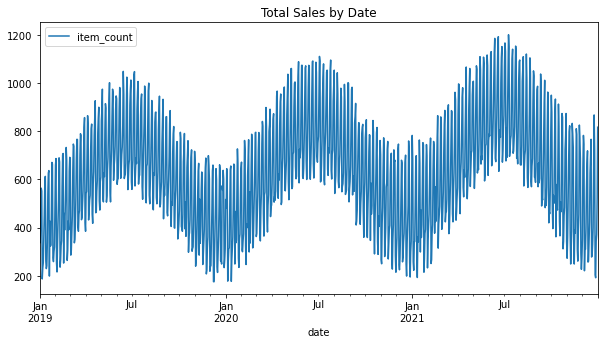

In [13]:
df_2years.plot(x="date", y="item_count", title='Total Sales by Date',figsize=(10, 5))

### Let`s see the amount of sales by day of the week

In [14]:
 df_sales[['weekday','item_count']].groupby(['weekday']).sum().reset_index()

,weekday,item_count
0,Friday,136300.0
1,Monday,70112.0
2,Saturday,135644.0
3,Sunday,68032.0
4,Thursday,116947.0
5,Tuesday,79454.0
6,Wednesday,88298.0


<AxesSubplot:title={'center':'Total Sales by Day of Week'}, xlabel='weekday'>

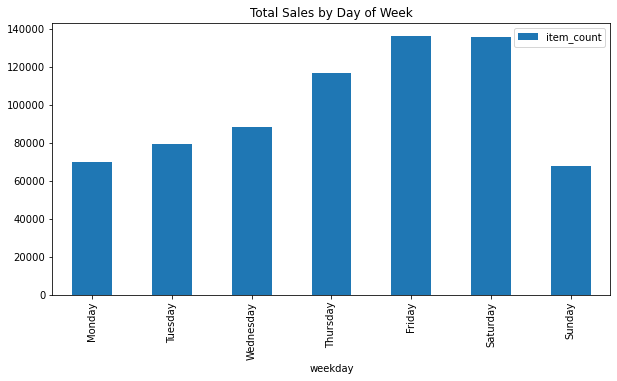

In [15]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

df_weekday_sales = df_sales[['weekday','item_count']].groupby(['weekday']).sum().reset_index()

# first index by the days then order and then set index by numbers
df_weekday_sales = df_weekday_sales.set_index("weekday").loc[day_order].reset_index()

df_weekday_sales.plot.bar(x='weekday', y='item_count', title='Total Sales by Day of Week',figsize=(10, 5))


<AxesSubplot:title={'center':'Total Sales by Day 2019'}, xlabel='date'>

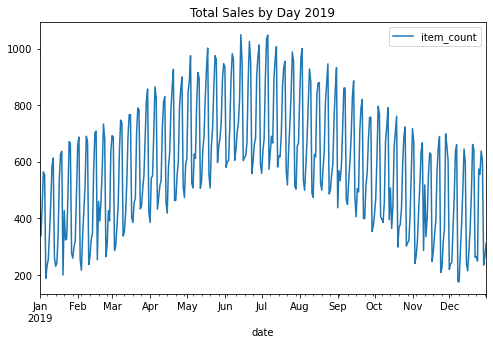

In [16]:
SINGLE_YEAR = 2019

df_sales_single_year = df_sales[df_sales['date'].dt.year == SINGLE_YEAR]

df_plot = df_sales_single_year[['date','item_count']].groupby(['date']).sum().reset_index() 

df_plot.plot(x='date', y='item_count', title=f'Total Sales by Day {SINGLE_YEAR}',figsize=(8, 5))

## Most Popular Items

In [17]:
df2 = df_sales[['item_id','item_count']].groupby(['item_id']).sum().reset_index().sort_values('item_count',ascending=False)
df2

,item_id,item_count
18,19,236337.0
15,16,102990.0
75,76,61043.0
37,38,52772.0
8,9,43874.0
...,...,...
39,40,0.0
85,86,0.0
82,83,0.0
76,77,0.0


In [18]:
df_items2 = df_items[['id','name']]
df_items2.columns = ['item_id','name']
df_popular = df2.merge(df_items2)
df_popular[:5]

,item_id,item_count,name
0,19,236337.0,Strawberry Smoothy
1,16,102990.0,Frozen Milky Smoothy
2,76,61043.0,Amazing pork lunch
3,38,52772.0,Mutton Dinner
4,9,43874.0,Orange Juice


In [19]:
df_sales

,date,item_id,price,item_count,weekday,week
0,2019-01-01,3,29.22,2.0,Tuesday,0
1,2019-01-01,4,26.42,22.0,Tuesday,0
2,2019-01-01,12,4.87,7.0,Tuesday,0
3,2019-01-01,13,4.18,12.0,Tuesday,0
4,2019-01-01,16,3.21,136.0,Tuesday,0
...,...,...,...,...,...,...
109595,2021-12-31,96,21.93,0.0,Friday,156
109596,2021-12-31,97,28.65,0.0,Friday,156
109597,2021-12-31,98,5.00,0.0,Friday,156
109598,2021-12-31,99,5.32,0.0,Friday,156


In [20]:
df_plot = df_sales[['weekday','item_id','item_count']].groupby(['weekday','item_id']).sum().reset_index()
df_plot = df_plot.set_index('weekday').loc[day_order].reset_index()
# left_on is for df_plot
# right_on is for df_items
df_plot = df_plot.merge(df_items,left_on="item_id",right_on="id")[['weekday','item_count','name']]
df_plot = df_plot[df_plot["item_count"] > 5000]
df_plot

,weekday,item_count,name
24,Thursday,5731.0,Amazing Steak Dinner with Rolls
25,Friday,6765.0,Amazing Steak Dinner with Rolls
26,Saturday,6714.0,Amazing Steak Dinner with Rolls
58,Wednesday,5542.0,Orange Juice
59,Thursday,7555.0,Orange Juice
60,Friday,8653.0,Orange Juice
61,Saturday,8547.0,Orange Juice
88,Friday,5370.0,Sweet Frozen Soft Drink
89,Saturday,5383.0,Sweet Frozen Soft Drink
105,Monday,10393.0,Frozen Milky Smoothy


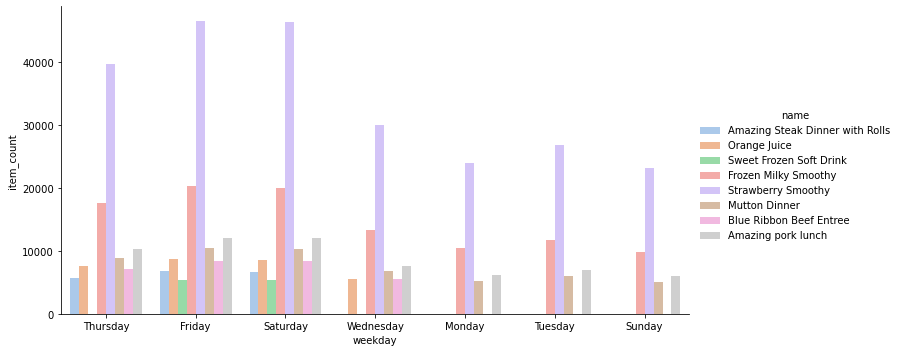

In [21]:
import seaborn as sns
sns.catplot(data=df_plot,x="weekday",y="item_count", 
            hue="name",palette="pastel",
            kind="bar",height=5, aspect=2,)
